<a href="https://colab.research.google.com/github/ImNotDanish05/2025_KC_TI-1A/blob/main/P9_Jobsheet_Supervise%20Learning%20-%20SVM%20dan%20Naive%20Bayes.ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import drive
import os
drive.mount('/content/drive')

def oslink(input):
  return os.path.join("/content/drive/MyDrive/Danish05/File Belajar/Coding Fun/Data/Kecerdasan Buatan/P9", input)

Mounted at /content/drive


1.	Pada praktikum percobaan 1 dan percobaan 2 yaitu implementasi algoritma SVM dan SVR anda telah mendapatkan nilai akurasi dari model. Carilah parameter pada algoritma SVM dan SVR sampai anda mendapatkan nilai akurasi terbaik dari kedua algoritma tersebut.
Nb : Anda bisa menggunakan teknik Grid Search

1.A

In [2]:
# Menyiapkan file
df = pd.read_csv(oslink("diabetes.csv"))
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
X = df[df.columns[:8]]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [4]:
# memisahkan label pada dataset dan menyimpannya pada sebuah variabel
y = df['Outcome']
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [5]:
from sklearn.model_selection import train_test_split

# memisahkan data untuk training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
from sklearn.svm import SVC

# membuat objek SVC dan memanggil fungsi fit untuk melatih model
clf = SVC()
clf.fit(X_train, y_train)

SVC()

In [7]:
# Menampilkan skor akurasi prediksi
clf.score(X_test, y_test)

0.7440944881889764

In [8]:
# Mencari parameter terbaik
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Parameter grid yang mau dicoba
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'linear']
}

# Buat objek GridSearchCV
grid = GridSearchCV(clf, param_grid, refit=True, verbose=2, cv=5)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.3s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.2s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.3s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.2s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'linear']},
             verbose=2)

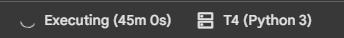

In [9]:
# Cetak parameter terbaik
print("Best parameters:", grid.best_params_)

# Akurasi terbaik
print("Best score (train):", grid.best_score_)

# Uji ke test set
print("Accuracy on test set:", grid.score(X_test, y_test))

Best parameters: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
Best score (train): 0.7723396154578336
Accuracy on test set: 0.7559055118110236


In [10]:
# Paling best pakai
# SVC(C=1, gamma=1, kernel='linear')
clf1 = SVC()
clf1.fit(X_train, y_train)
clf2 = SVC(C=1, gamma=1, kernel='linear')
clf2.fit(X_train, y_train)
clf1.score(X_test, y_test), clf2.score(X_test, y_test)

(0.7440944881889764, 0.7559055118110236)

1.B

In [2]:
import pandas as pd

# membaca dataset dan mengubahnya menjadi dataframe
data = pd.read_csv(oslink('Salary_Data.csv'))
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes
None


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
import numpy as np

# memisahkan atribut dan label
X = data[['YearsExperience']]
y = data[['Salary']]

# mengubah bentuk atribut
X = X[::np.newaxis]
print(X.shape)
print(y.shape)
X

(30, 1)
(30, 1)


,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [4]:
y

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


In [5]:
from sklearn.svm import SVR

# membangun model dengan parameter C, gamma, dan kernel
model = SVR(C=1000, gamma=0.05, kernel='rbf')

# melatih model dengan fungsi fit
model.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1000, gamma=0.05)

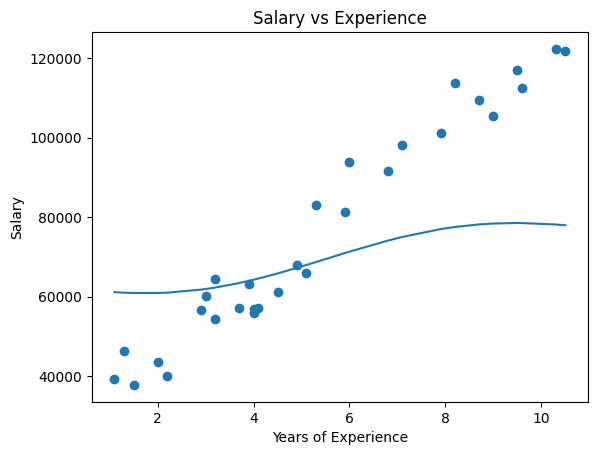

In [6]:
import matplotlib.pyplot as plt

# memvisualisasikan model
plt.title("Salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.scatter(X, y)
plt.plot(X, model.predict(X))

In [7]:
# Mencari parameter terbaik
from sklearn.model_selection import GridSearchCV

# Parameter grid yang mau dicoba
param_grid = {
    'C': [0.1, 1, 10, 100, 1000, 10000],
    'gamma': [1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001],
    'kernel': ['rbf', 'linear']
}

# Buat objek GridSearchCV
grid = GridSearchCV(model, param_grid, refit=True, verbose=2, cv=5)
grid.fit(X, y)

NameError: name 'X_train' is not defined

In [ ]:
# Cetak parameter terbaik
print("Best parameters:", grid.best_params_)

# Akurasi terbaik
print("Best score (train):", grid.best_score_)

# Uji ke test set
print("Accuracy on test set:", grid.score(X_test, y_test))

2.	Pada praktikum percobaan 3 yaitu implementasi algoritma Naïve Bayes anda telah mendapatkan nilai akurasi yang cukup tinggi, namun hasil akurasi tersebut masih dapat ditinggkatkan menggunakan hyperparameter tunning. Carilah parameter pada algoritma Naïve Bayes sampai anda mendapatkan nilai akurasi yang lebih tinggi daripada nilai akurasi pada percobaan.

In [9]:
# import library yang digunakan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# load dataset
dataset = pd.read_csv(oslink('iklan_sosmed.csv'), delimiter=';')
dataset.head()

In [ ]:
X = dataset.iloc[:,2:-1]
X

In [ ]:
y = dataset.iloc[:,-1]
y

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
X_train

In [ ]:
X_train = X_train.values
X_train

In [ ]:
y_train = y_train.values
y_train

In [ ]:
X_test = X_test.values
X_test

In [ ]:
y_test = y_test.values
y_test

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc

In [ ]:
X_train = sc.fit_transform(X_train)
X_train

In [ ]:
X_test = sc.transform(X_test)
X_test

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

In [ ]:
classifier

In [ ]:
# prediksi X_test
y_pred = classifier.predict(X_test)
y_pred

In [ ]:
y_test

In [ ]:
# buat confussion matrix & skor akurasi
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

print("Akurasi : {}%".format(acc*100))
print("Confussion Matrix : ")
print(cm)

In [ ]:
# visualisasi sampel data train
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifier (Sampel Training)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()

In [ ]:
# visualisasi sampel data tes
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Klasifier (Sampel Testing)')
plt.xlabel('Umur')
plt.ylabel('Perkiraan Gaji')
plt.legend()

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Definisikan grid parameter untuk var_smoothing
# Biasanya nilai sangat kecil, coba dalam skala logaritmik
param_grid_nb = {
    'var_smoothing': np.logspace(0, -9, num=100) # Dari 1.0 ke 1e-9
}

nb_clf = GaussianNB()
grid_search_nb = GridSearchCV(nb_clf, param_grid_nb, cv=5, scoring='accuracy', verbose=1)
grid_search_nb.fit(X_train, y_train)

print("\n--- Hasil Grid Search GaussianNB ---")
print("Parameter terbaik: ", grid_search_nb.best_params_)
print("Skor akurasi terbaik (training CV): {:.2f}%".format(grid_search_nb.best_score_ * 100))

# Prediksi dengan model terbaik
y_pred_best_nb = grid_search_nb.predict(X_test)
acc_best_nb = accuracy_score(y_test, y_pred_best_nb)
print("Akurasi terbaik di data test: {:.2f}%".format(acc_best_nb * 100))